# LangGraph DEMO

## Define state

In [28]:
from typing import TypedDict
import random
from typing import Literal
from IPython.display import Image, display

from langgraph.graph import StateGraph, START, END

class State(TypedDict):
    graph_state: str

## Define nodes and edges

In [29]:
def intro_node(state: State):
    print("Inside intro_node. Modifying state.\n\n")
    return {"graph_state": state['graph_state'] +"Welcome to DHS 2025."}

def ai_node(state: State):
    print("Inside ai_node. Modifying state.\n\n")
    # AI operations
    return {"graph_state": state['graph_state'] +" I'm an AI agent node"}

def code_node(state: State):
    print("Inside code_node. Modifying state.\n\n")
    # code logic
    return {"graph_state": state['graph_state'] +" I'm a code node"}

def edge_condition(state: State) -> Literal["ai_node", "code_node"]:
    print(f"Inside edge with {state} \n\n")
    
    if random.random() < 0.5:
        return "ai_node"
    return "code_node"

## Create graph

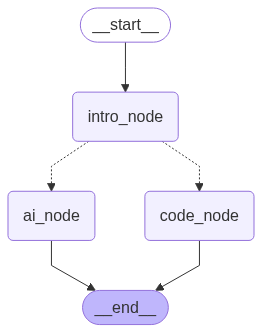

In [30]:
builder = StateGraph(State)
builder.add_node("intro_node", intro_node)
builder.add_node("ai_node", ai_node)
builder.add_node("code_node", code_node)


builder.add_edge(START, "intro_node")
builder.add_conditional_edges("intro_node", edge_condition)
builder.add_edge("ai_node", END)
builder.add_edge("code_node", END)

graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

## Run graph

In [31]:
# Unique state variable for each run
graph.invoke({"graph_state" : "Hi!, I'm Kartik. "})

Inside intro_node. Modifying state.


Inside edge with {'graph_state': "Hi!, I'm Kartik. Welcome to DHS 2025."} 


Inside code_node. Modifying state.




{'graph_state': "Hi!, I'm Kartik. Welcome to DHS 2025. I'm a code node"}

# LangSmith Tracing DEMO

## Setup LangSmith

In [32]:
from dotenv import load_dotenv
print(load_dotenv('.env'))

# LANGSMITH_TRACING="true"
# LANGSMITH_ENDPOINT="https://api.smith.langchain.com"
# LANGSMITH_PROJECT="agentic-ops"
# LANGSMITH_API_KEY=""
# OPENAI_API_KEY=""

True


In [33]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4.1-mini", temperature=0)

def real_ai_node(state: State):
    print("Inside ai_node. Modifying state.\n\n")
    resp = llm.invoke(state['graph_state'])
    return {"graph_state": state['graph_state'] +" I'm AI. The weather in Bangalore today is " + resp.content}


def edge_condition(state: State) -> Literal["real_ai_node", "code_node"]:
    return "real_ai_node"

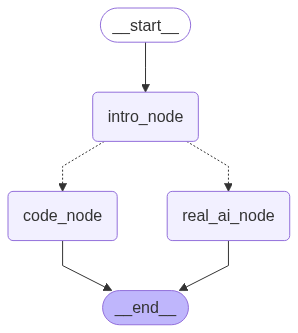

In [34]:
builder = StateGraph(State)
builder.add_node("intro_node", intro_node)
builder.add_node("real_ai_node", real_ai_node)
builder.add_node("code_node", code_node)


builder.add_edge(START, "intro_node")
builder.add_conditional_edges("intro_node", edge_condition)
builder.add_edge("real_ai_node", END)
builder.add_edge("code_node", END)

graph2 = builder.compile()
display(Image(graph2.get_graph().draw_mermaid_png()))

In [35]:
import uuid
thread_id = uuid.uuid4()
config = {"configurable": {"thread_id": thread_id}, "metadata": {"thread_id": thread_id}}
print(config)
graph2.invoke({"graph_state" : "What is the capital of Karnataka? "}, config=config)

{'configurable': {'thread_id': UUID('330eb26f-4161-40a2-8ca7-f410f17cc461')}, 'metadata': {'thread_id': UUID('330eb26f-4161-40a2-8ca7-f410f17cc461')}}
Inside intro_node. Modifying state.


Inside ai_node. Modifying state.




{'graph_state': "What is the capital of Karnataka? Welcome to DHS 2025. I'm AI. The weather in Bangalore today is The capital of Karnataka is Bengaluru.  \nWelcome to DHS 2025! How can I assist you today?"}

In [36]:
# Multi-turn graph
graph2.invoke({"graph_state" : "What is there to do in Bangalore in the month of August?"}, config=config)

Inside intro_node. Modifying state.


Inside ai_node. Modifying state.




{'graph_state': "What is there to do in Bangalore in the month of August?Welcome to DHS 2025. I'm AI. The weather in Bangalore today is Welcome to DHS 2025! If you're visiting Bangalore in August, you're in for a treat. August is part of the monsoon season in Bangalore, which means the city is lush and green, with pleasant weather and occasional showers. Here are some great things to do in Bangalore during August:\n\n### Outdoor Activities & Nature\n1. **Lalbagh Botanical Garden**  \n   Enjoy the vibrant greenery and blooming flowers. The monsoon season makes the garden especially beautiful. Don’t miss the famous glasshouse and the lake area.\n\n2. **Cubbon Park**  \n   A perfect spot for morning walks, cycling, or just relaxing amidst nature. The park is cooler and fresher during the rains.\n\n3. **Nandi Hills**  \n   A bit outside the city, this hill station is great for a day trip. The monsoon mist adds a magical touch to the views. Ideal for trekking and photography.\n\n4. **Banner